In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv('./data/data.csv', delimiter=',')
data.head()

,Country,Country Code,Region,Date,Year,Number of MPs,Percent female MPs,Mean age,Median age,Percent MPs aged 30 or under,...,Percent female MPs aged 41 to 60,Percent female MPs aged 61 or over,Age Representation Index 30 or under (ARI 30),Age Representation Index 35 or under (ARI 35),Age Representation Index 40 or under (ARI 40),Age Representation Index 41 to 60 (ARI 41 to 60),Age Representation Index 61 or over (ARI 61 plus),Coverage MPs,Coverage Age,Coverage Gender
0,Afghanistan,AFG,Middle East and North Africa,2011-01-26,2011,249,27.0,43.9,46.0,13.0,...,16.7,0.0,0.63,0.74,1.23,1.91,0.38,104.0,6.0,99.0
1,Åland,ALA,Western Europe,2007-01-02,2007,30,30.0,51.9,52.0,0.0,...,56.0,33.0,0.00,0.62,0.62,1.29,1.06,100.0,100.0,100.0
2,Åland,ALA,Western Europe,2011-01-02,2011,30,23.0,50.6,50.0,3.0,...,71.0,14.0,0.20,0.33,0.74,1.42,0.75,100.0,100.0,100.0
3,Åland,ALA,Western Europe,2015-11-02,2015,30,30.0,50.7,51.5,3.0,...,78.0,0.0,0.20,0.33,0.62,1.83,0.40,100.0,100.0,100.0
4,Åland,ALA,Western Europe,2019-02-09,2019,30,30.0,51.3,52.5,6.7,...,44.4,22.2,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0


### Data Wrangling

In [4]:
data.columns

Index(['Country', 'Country Code', 'Region', 'Date', 'Year', 'Number of MPs',
       'Percent female MPs', 'Mean age', 'Median age',
       'Percent MPs aged 30 or under', 'Percent MPs aged 35 or under',
       'Percent MPs aged 40 or under', 'Percent MPs aged 41 to 60',
       'Percent MPs aged 61 or over', 'Percent female MPs aged 30 or under',
       'Percent female MPs aged 35 or under',
       'Percent female MPs aged 40 or under',
       'Percent female MPs aged 41 to 60',
       'Percent female MPs aged 61 or over',
       'Age Representation Index 30 or under (ARI 30)',
       'Age Representation Index 35 or under (ARI 35)',
       'Age Representation Index 40 or under (ARI 40)',
       'Age Representation Index 41 to 60 (ARI 41 to 60)',
       'Age Representation Index 61 or over (ARI 61 plus)', 'Coverage MPs',
       'Coverage Age', 'Coverage Gender'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            921 non-null    object 
 1   Country Code                                       892 non-null    object 
 2   Region                                             921 non-null    object 
 3   Date                                               921 non-null    object 
 4   Year                                               921 non-null    int64  
 5   Number of MPs                                      921 non-null    int64  
 6   Percent female MPs                                 921 non-null    float64
 7   Mean age                                           921 non-null    float64
 8   Median age                                         921 non-null    float64
 9   Percent MP

In [6]:
data.describe(exclude=[object])

,Year,Number of MPs,Percent female MPs,Mean age,Median age,Percent MPs aged 30 or under,Percent MPs aged 35 or under,Percent MPs aged 40 or under,Percent MPs aged 41 to 60,Percent MPs aged 61 or over,...,Percent female MPs aged 41 to 60,Percent female MPs aged 61 or over,Age Representation Index 30 or under (ARI 30),Age Representation Index 35 or under (ARI 35),Age Representation Index 40 or under (ARI 40),Age Representation Index 41 to 60 (ARI 41 to 60),Age Representation Index 61 or over (ARI 61 plus),Coverage MPs,Coverage Age,Coverage Gender
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,...,921.000000,921.000000,867.000000,867.000000,867.000000,867.000000,867.000000,916.000000,916.000000,916.000000
mean,2005.135722,210.843648,19.282410,49.829305,49.899891,3.349946,9.589577,20.795103,61.995103,16.610011,...,55.057448,10.973963,0.149815,0.309493,0.525421,2.001073,0.912907,102.942686,75.936463,89.385480
std,16.198297,232.941627,13.813254,4.677229,5.082291,4.763693,7.852063,13.421524,14.855831,14.651408,...,28.882120,17.725020,0.220608,0.280102,0.379668,0.795035,0.856353,39.395586,32.628674,24.937454
min,1945.000000,7.000000,0.000000,34.500000,33.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000
25%,1999.000000,65.000000,8.000000,47.000000,47.000000,0.000000,3.800000,12.500000,55.500000,7.600000,...,46.200000,0.000000,0.000000,0.110000,0.290000,1.600000,0.360000,100.000000,47.000000,98.075000
50%,2011.000000,150.000000,17.400000,49.200000,49.000000,2.000000,8.700000,19.800000,63.600000,12.800000,...,61.200000,5.300000,0.090000,0.270000,0.480000,1.890000,0.670000,100.000000,97.700000,100.000000
75%,2016.000000,300.000000,29.300000,52.000000,52.000000,4.800000,13.700000,28.400000,71.100000,21.200000,...,72.100000,14.200000,0.210000,0.430000,0.690000,2.170000,1.130000,105.000000,100.000000,100.000000
max,2023.000000,2980.000000,66.700000,77.000000,77.000000,50.000000,61.100000,100.000000,100.000000,100.000000,...,100.000000,100.000000,2.970000,2.290000,2.850000,6.110000,5.870000,843.000000,140.100000,141.300000


In [7]:
data.columns[data.isnull().any()]

Index(['Country Code', 'Age Representation Index 30 or under (ARI 30)',
       'Age Representation Index 35 or under (ARI 35)',
       'Age Representation Index 40 or under (ARI 40)',
       'Age Representation Index 41 to 60 (ARI 41 to 60)',
       'Age Representation Index 61 or over (ARI 61 plus)', 'Coverage MPs',
       'Coverage Age', 'Coverage Gender'],
      dtype='object')

##### Clean the `Country Code` column

In [8]:
data[data['Country Code'].isna()]['Country'].unique()

array(['Kosovo', 'Northern Ireland', 'Scotland', 'Wales',
       'Nagorno-Karabakh', 'South Ossetia'], dtype=object)

In [9]:
countries_and_codes_dict = dict(data[['Country', 'Country Code']])
# Missing codes dict (ISO 3166)
missing_codes = {
    'Kosovo':'KSV', 
    'Northern Ireland': 'GB-NIR', #gov.uk
    'Scotland': 'GB-SCT', #gov.uk
    'Wales':'GB-WLS', #gov.uk
    'Nagorno-Karabakh':'NGK', 
    'South Ossetia':'SOS'
}
countries_and_codes_dict.update(missing_codes)

data['Country Code'] = data.apply(lambda row: countries_and_codes_dict[row['Country']] \
                                  if pd.isnull(row['Country Code']) else row['Country Code'], axis = 1)
data['Country Code'].isnull().sum()

0

##### Clean the columns
 - `Age Representation Index 30 or under (ARI 30)`
 - `Age Representation Index 35 or under (ARI 35)`
 - `Age Representation Index 40 or under (ARI 40)`
 - `Age Representation Index 41 to 60 (ARI 41 to 60)`
 - `Age Representation Index 61 or over (ARI 61 plus)`

In [10]:
def mean_imputer(df: pd.DataFrame, col: str) -> None:
    mean_col = df[col].mean()
    df.fillna({col: mean_col}, inplace=True)

In [11]:
representation_index_cols = ['Age Representation Index 30 or under (ARI 30)',
       'Age Representation Index 35 or under (ARI 35)',
       'Age Representation Index 40 or under (ARI 40)',
       'Age Representation Index 41 to 60 (ARI 41 to 60)',
       'Age Representation Index 61 or over (ARI 61 plus)']

for col in representation_index_cols:
    mean_imputer(data, col)

for col in representation_index_cols:
    print(data[col].isnull().sum())

0
0
0
0
0


##### Clean the columns
 - `Coverage Age` 
 - `Coverage MPs`
 - `Coverage Gender`

In [12]:
def drop_missing_data(df: pd.DataFrame, col: str, threshold: int | float) -> pd.DataFrame | None:
    missing_percent = df[col].isnull().mean() * 100
    if missing_percent <= threshold:
        print(f"Misssing percentage {missing_percent:.3f}, dropping NaNs in {col}")
        df.dropna(subset=[col], inplace=True)
        
    else:
        print(f"Misssing percentage {missing_percent:.3f}, won't drop NaNs in {col}")


In [13]:
coverage_cols = ['Coverage MPs',
       'Coverage Age', 'Coverage Gender']

for col in coverage_cols:
    drop_missing_data(data, col, 2.5)

Misssing percentage 0.543, dropping NaNs in Coverage MPs
Misssing percentage 0.000, dropping NaNs in Coverage Age
Misssing percentage 0.000, dropping NaNs in Coverage Gender


In [14]:
data.columns[data.isnull().any()]

Index([], dtype='object')

### EDA and Questions

#### 1. How did the percentage of female MPs vary across countries in the 90s 

In [29]:
countries = {}
for country in list(data['Country']):
    if country in countries.keys():
        countries[country] += 1
    countries[country] = 1

len(countries)

194

In [16]:
data['Percent female MPs'].describe()

count    916.000000
mean      19.224454
std       13.807399
min        0.000000
25%        8.000000
50%       17.400000
75%       29.225000
max       66.700000
Name: Percent female MPs, dtype: float64

In [40]:
data_90s = data[(data['Year'] >= 1990) & (data['Year'] <= 1999)]
data_90s = data_90s.groupby(by='Country').agg({'Country Code': 'first','Percent female MPs': 'mean'}).reset_index()
data_90s.rename(columns={'PPercent female MPs': 'Mean Percent female MPs (90s)'})
data_90s.head()

,Country,Country Code,Percent female MPs
0,Anguilla,AIA,0.000000
1,Australia,AUS,13.600000
2,Belgium,BEL,14.066667
3,Brazil,BRA,5.800000
4,Burkina Faso,BFA,1.900000


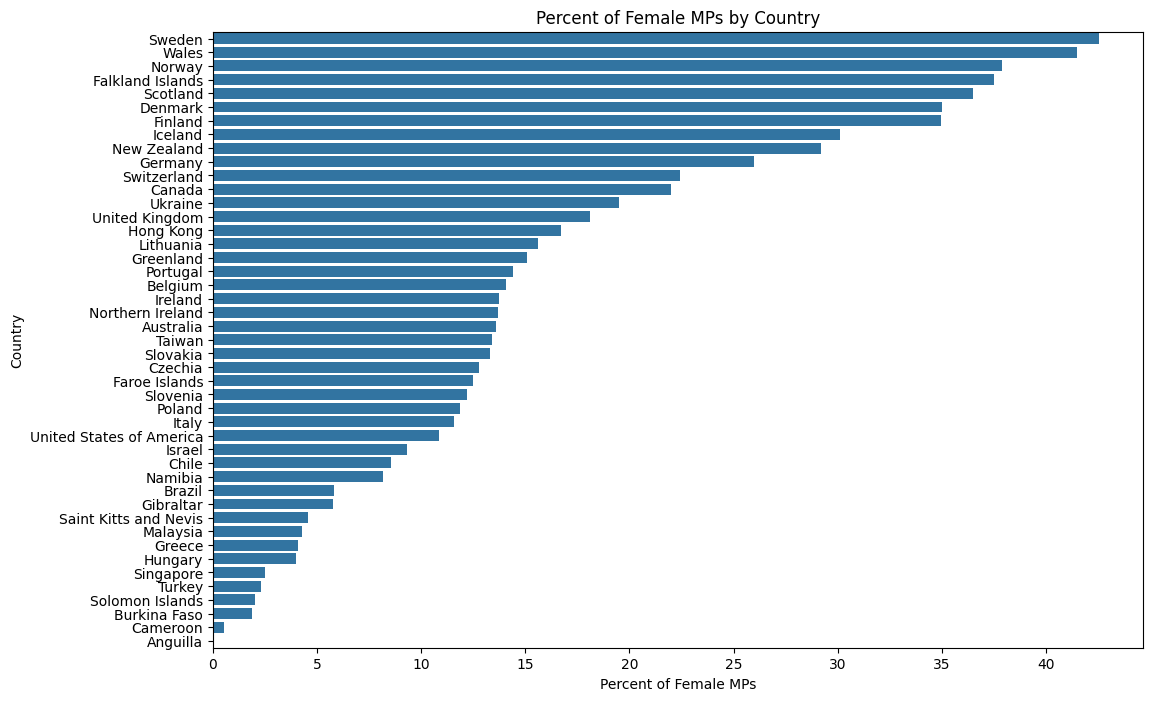

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Percent female MPs', y='Country', data=data_90s.sort_values('Percent female MPs', ascending=False))
plt.title('Percent of Female MPs by Country')
plt.xlabel('Percent of Female MPs')
plt.ylabel('Country')
plt.show()

In [41]:
data_90s.nlargest(5, 'Percent female MPs')[['Country','Percent female MPs']]

,Country,Percent female MPs
37,Sweden,42.533333
44,Wales,41.500000
28,Norway,37.900000
10,Falkland Islands,37.500000
32,Scotland,36.500000


In [42]:
data_90s.nsmallest(5, 'Percent female MPs')[['Country','Percent female MPs']]

,Country,Percent female MPs
0,Anguilla,0.000000
5,Cameroon,0.550000
4,Burkina Faso,1.900000
36,Solomon Islands,2.000000
40,Turkey,2.333333


In [43]:
max(data['Year'])

2023

#### 2. How has the represenation of female MPs and MPs aged 30 or under changed over time?

In [55]:
df = data[['Year', 'Percent female MPs', 'Percent MPs aged 30 or under']]
df.head()

,Year,Percent female MPs,Percent MPs aged 30 or under
0,2011,27.0,13.0
1,2007,30.0,0.0
2,2011,23.0,3.0
3,2015,30.0,3.0
4,2019,30.0,6.7


In [56]:
df_grouped_year = df.groupby('Year').agg({
    'Percent female MPs':'mean',
    'Percent MPs aged 30 or under':'mean'
}).reset_index() 

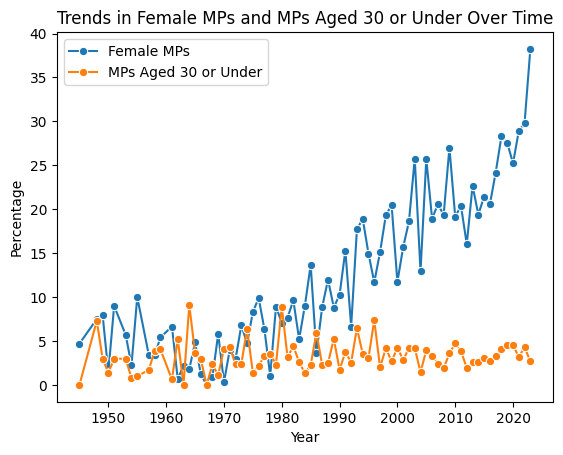

In [61]:
sns.lineplot(x='Year', y='Percent female MPs', data=df_grouped_year, label='Female MPs', marker='o')
sns.lineplot(x='Year', y='Percent MPs aged 30 or under', data=df_grouped_year, label='MPs Aged 30 or Under', marker='o')
plt.title('Trends in Female MPs and MPs Aged 30 or Under Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()

#### 3. Is there a relationship between age and the number of female MPs across different countries

In [71]:
df = data[['Mean age', 'Percent female MPs',]]
df.describe()

,Mean age,Percent female MPs
count,916.000000,916.000000
mean,49.827828,19.224454
std,4.677962,13.807399
min,34.500000,0.000000
25%,47.000000,8.000000
50%,49.200000,17.400000
75%,52.000000,29.225000
max,77.000000,66.700000


In [72]:
correlation, p_value = pearsonr(df['Mean age'], df['Percent female MPs'])
print(f'Pearson Correlation: {correlation:.3f}\nP Value: {p_value}')

Pearson Correlation: -0.095
P Value: 0.0038829557242880106


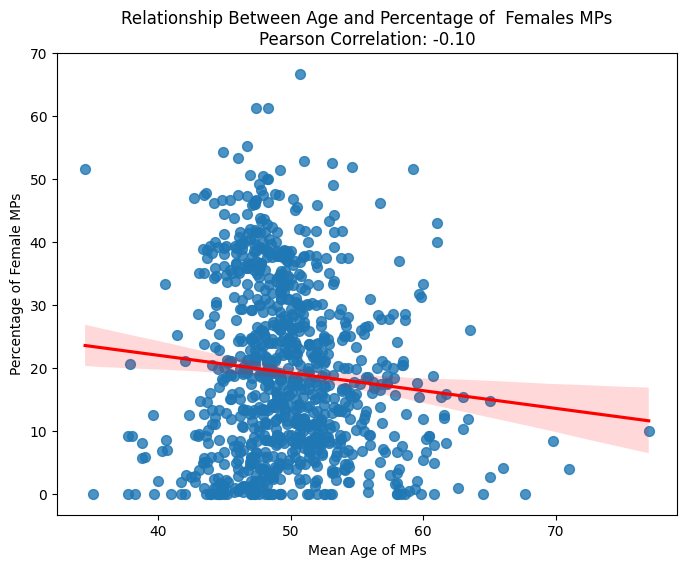

In [73]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Mean age', y='Percent female MPs', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title(f'Relationship Between Age and Percentage of  Females MPs\nPearson Correlation: {correlation:.2f}')
plt.xlabel('Mean Age of MPs')
plt.ylabel('Percentage of Female MPs')
plt.show()